# COVID-19 Italian Data Preliminary Analysis  

In [3]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns; sns.set(rc={'figure.figsize':(15, 12)})

In [4]:
data_dir = Path(".") / "data" 
national = data_dir / "dati-andamento-nazionale" / "dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(national, index_col=0,parse_dates=[0])

In [5]:
df.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,,
2020-03-20 17:00:00,ITA,16020,2655,18675,19185,37860,4670,5129,4032,47021,206886
2020-03-21 17:00:00,ITA,17708,2857,20565,22116,42681,4821,6072,4825,53578,233222
2020-03-22 17:00:00,ITA,19846,3009,22855,23783,46638,3957,7024,5476,59138,258402
2020-03-23 17:00:00,ITA,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468
2020-03-24 17:00:00,ITA,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964


In [6]:
df = df.drop(columns=["stato"])
df.index.name='date'
df.index = df.index.to_period(freq='D')

In [7]:
df.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-20,16020,2655,18675,19185,37860,4670,5129,4032,47021,206886
2020-03-21,17708,2857,20565,22116,42681,4821,6072,4825,53578,233222
2020-03-22,19846,3009,22855,23783,46638,3957,7024,5476,59138,258402
2020-03-23,20692,3204,23896,26522,50418,3780,7432,6077,63927,275468
2020-03-24,21937,3396,25333,28697,54030,3612,8326,6820,69176,296964


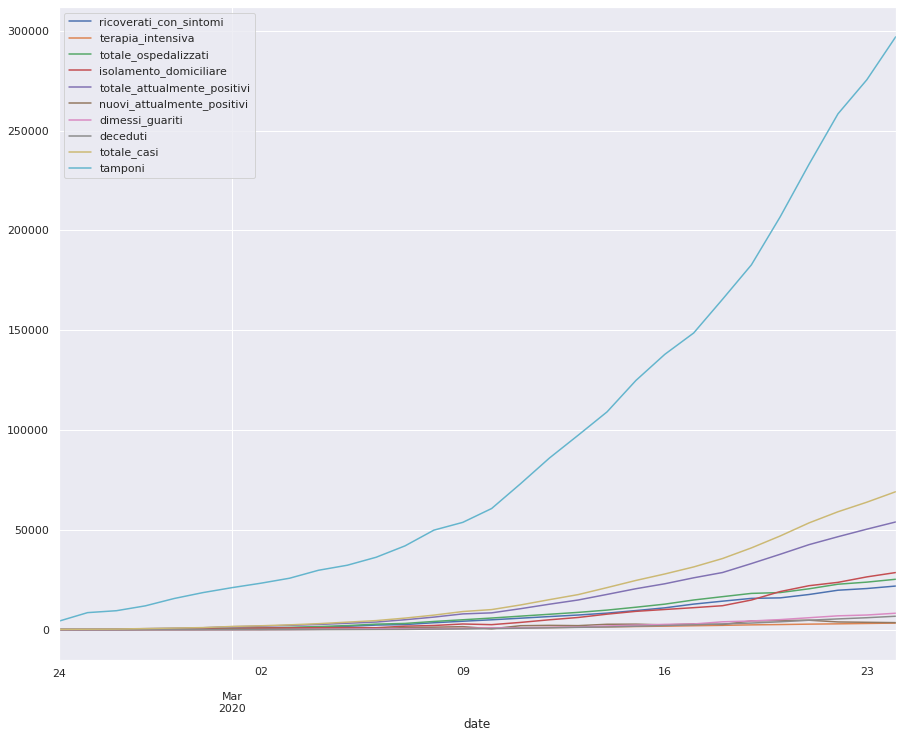

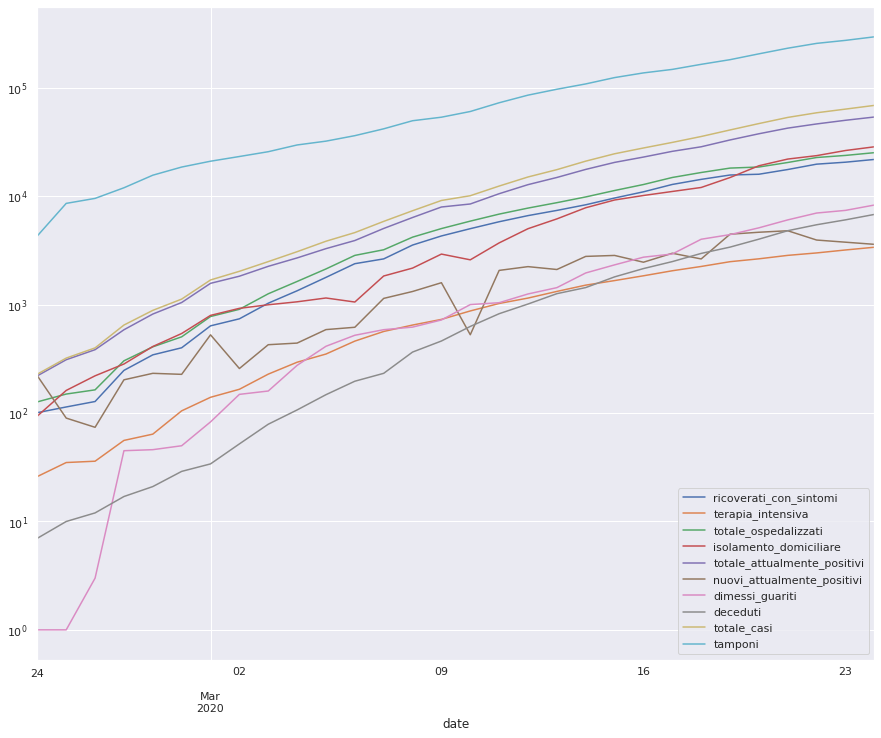

In [8]:
df.plot()
df.plot(logy=True);

In [9]:
deltadf = df.diff().dropna().astype(np.int)
percdf = df.pct_change().dropna()

In [10]:
deltadf.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-20,263,157,420,4250,4670,190,689,627,5986,24109
2020-03-21,1688,202,1890,2931,4821,151,943,793,6557,26336
2020-03-22,2138,152,2290,1667,3957,-864,952,651,5560,25180
2020-03-23,846,195,1041,2739,3780,-177,408,601,4789,17066
2020-03-24,1245,192,1437,2175,3612,-168,894,743,5249,21496


In [11]:
percdf.tail()

,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
date,,,,,,,,,,
2020-03-20,0.016691,0.062850,0.023007,0.284566,0.140705,0.042411,0.155180,0.184141,0.145875,0.131904
2020-03-21,0.105368,0.076083,0.101205,0.152776,0.127338,0.032334,0.183857,0.196677,0.139448,0.127297
2020-03-22,0.120736,0.053203,0.111354,0.075375,0.092711,-0.179216,0.156785,0.134922,0.103774,0.107966
2020-03-23,0.042628,0.064806,0.045548,0.115166,0.081050,-0.044731,0.058087,0.109752,0.080980,0.066044
2020-03-24,0.060168,0.059925,0.060136,0.082007,0.071641,-0.044444,0.120291,0.122264,0.082109,0.078034


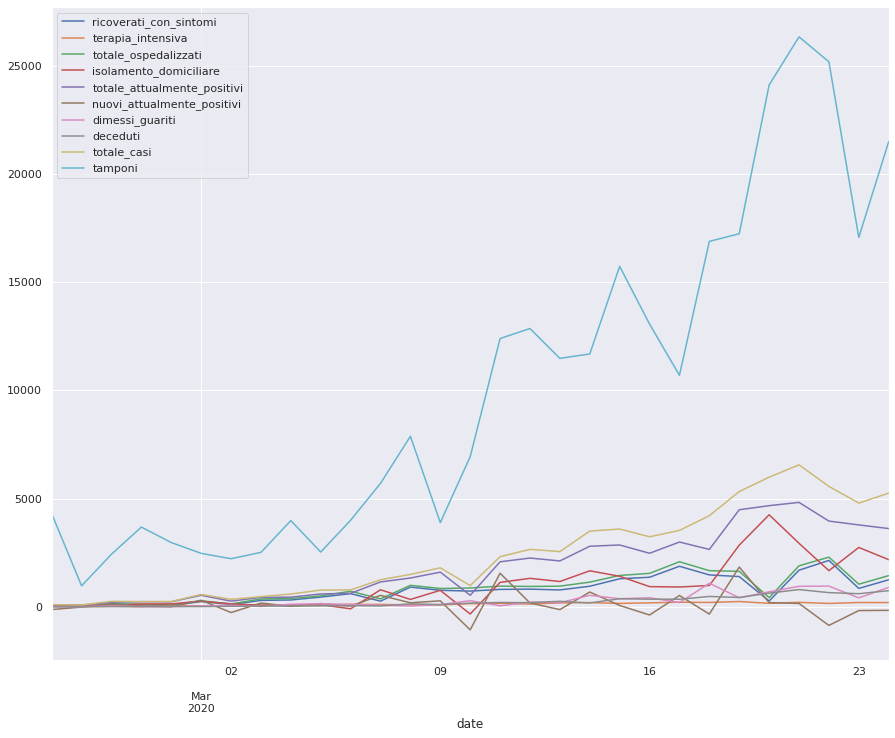

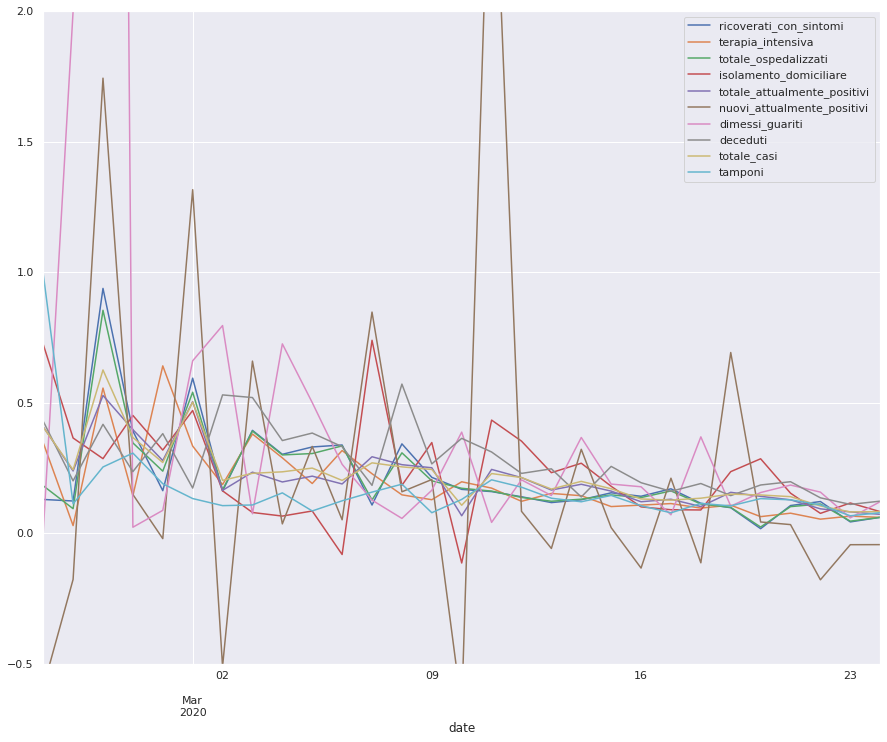

In [12]:
deltadf.plot()
percdf.plot(ylim=(-0.5, 2));

In [13]:
growthdf = pd.DataFrame({'total': df.totale_casi, 'diff1': df.totale_casi.diff(), 'diff2':df.totale_casi.diff().diff()})

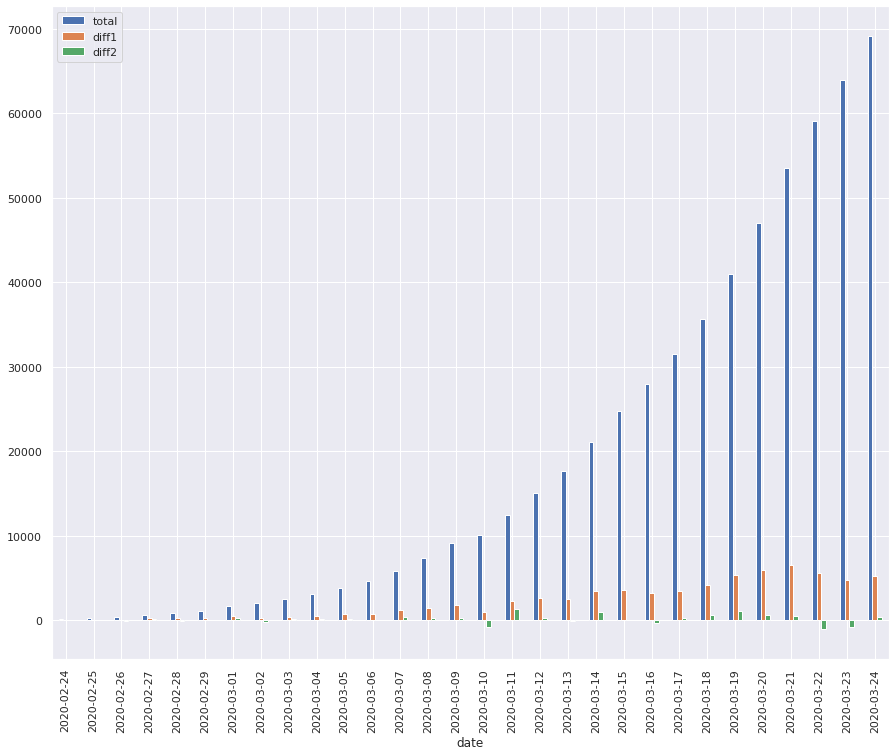

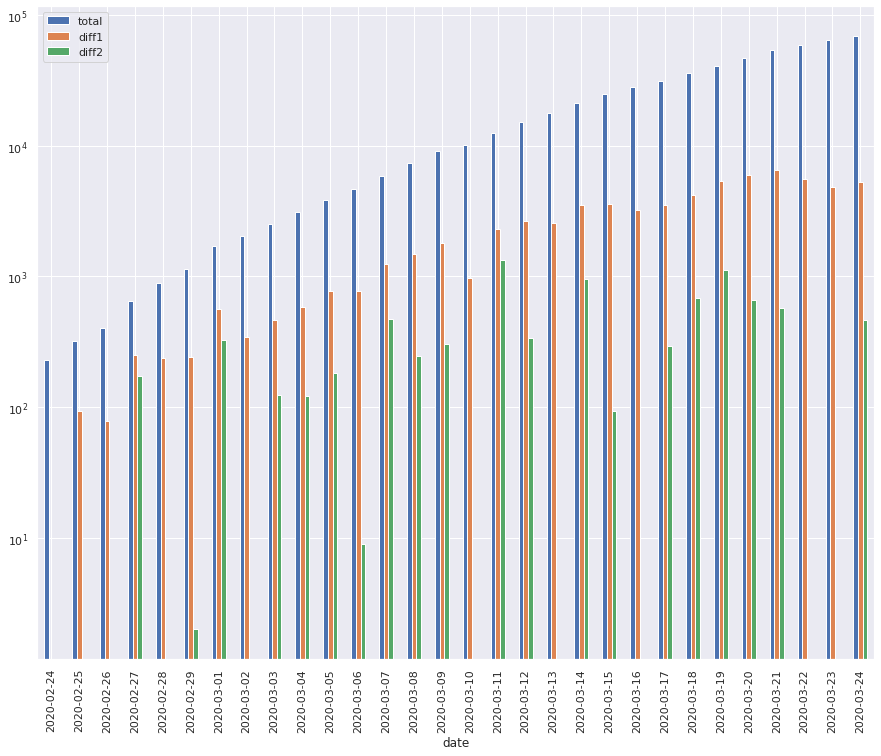

In [14]:
growthdf.plot(kind='bar')
growthdf.plot(kind='bar', logy=True);